In [1]:
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from sklearn.metrics import confusion_matrix
from keras.utils import np_utils
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\Shhhriyr\OneDrive\Desktop\Balanced_dataset.csv", delimiter=",")
df[0:5]

,age,sex,city,province,country,lives_in_Wuhan,travel_history_location,additional_information,chronic_disease_binary,chronic_disease,...,shortness of breath,somnolence,sore throat,sputum,septic shock,Heart attack,cold,cardiac disease,hypoxia,outcome
0,65.0,0,Seattle,Washington,United States,NaN,NaN,family member of a confirmed case of COVID-19,0,NaN,...,0,0,0,0,0,0,0,0,0,recovered
1,54.0,0,Taguig,Metro Manila,Philippines,NaN,NaN,C871964,0,NaN,...,0,0,0,0,0,0,0,0,0,recovered
2,40.0,0,Pasay,Metro Manila,Philippines,NaN,NaN,C430124,0,NaN,...,0,0,0,0,0,0,0,0,0,recovered
3,28.0,0,Muntinlupa,Metro Manila,Philippines,NaN,NaN,C741550,0,NaN,...,0,0,0,0,0,0,0,0,0,recovered
4,30.0,0,Cainta,Rizal,Philippines,NaN,NaN,C535553,0,NaN,...,0,0,0,0,0,0,0,0,0,recovered


In [3]:
df.groupby('outcome').size()

outcome
died         6010
recovered    6010
dtype: int64

In [4]:
df=df.replace('died',0)
df=df.replace('recovered',1)
df=df.replace('stable',1)
df=df.replace('severe',0)
df['chronic_disease'].fillna(0,inplace = True)
df1=df
df2=df

In [5]:
df.head()

,age,sex,city,province,country,lives_in_Wuhan,travel_history_location,additional_information,chronic_disease_binary,chronic_disease,...,shortness of breath,somnolence,sore throat,sputum,septic shock,Heart attack,cold,cardiac disease,hypoxia,outcome
0,65.0,0,Seattle,Washington,United States,NaN,NaN,family member of a confirmed case of COVID-19,0,0,...,0,0,0,0,0,0,0,0,0,1
1,54.0,0,Taguig,Metro Manila,Philippines,NaN,NaN,C871964,0,0,...,0,0,0,0,0,0,0,0,0,1
2,40.0,0,Pasay,Metro Manila,Philippines,NaN,NaN,C430124,0,0,...,0,0,0,0,0,0,0,0,0,1
3,28.0,0,Muntinlupa,Metro Manila,Philippines,NaN,NaN,C741550,0,0,...,0,0,0,0,0,0,0,0,0,1
4,30.0,0,Cainta,Rizal,Philippines,NaN,NaN,C535553,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
df.columns

Index(['age', 'sex', 'city', 'province', 'country', 'lives_in_Wuhan',
       'travel_history_location', 'additional_information',
       'chronic_disease_binary', 'chronic_disease',
       'chronic_disease_Hypertension', 'chronic_disease_Diabetes',
       'chronic_disease_kidney', 'chronic_disease_COPD',
       'chronic_disease_heart', 'chronic_disease_asthma',
       'chronic_disease_cardiac', 'chronic_disease_prostate',
       'chronic_disease_cancer', 'chronic_disease_TB',
       'chronic_disease_Hepatitis', 'chronic_disease_HIV',
       'chronic_disease_cereberal', 'chronic_disease_Parkinson',
       'chronic_disease_bronchitis', 'chronic_disease_hypothyroidism',
       'chronic_disease_dyslipidemia', 'anorexia', 'chest pain', 'chills',
       'conjunctivitis', 'cough', 'diarrhea', 'dizziness', 'dyspnea', 'emesis',
       'expectoration', 'eye irritation', 'fatigue', 'fever', 'gasp',
       'headache', 'kidney failure', 'lesions on chest radiographs',
       'hypertension', 'Myalgi

In [7]:
num_feat=['age', 'sex', 'anorexia', 'chronic_disease_binary','chronic_disease_Hypertension', 
       'chronic_disease_Diabetes','chronic_disease_kidney', 'chronic_disease_COPD',
       'chronic_disease_heart', 'chronic_disease_asthma','chronic_disease_cardiac', 
       'chronic_disease_prostate','chronic_disease_cancer', 'chronic_disease_TB',
       'chronic_disease_Hepatitis', 'chronic_disease_HIV','chronic_disease_cereberal', 
       'chronic_disease_Parkinson','chronic_disease_bronchitis', 'chronic_disease_hypothyroidism',
       'chronic_disease_dyslipidemia', 'anorexia', 'chest pain',
       'chills', 'conjunctivitis', 'cough', 'diarrhea', 'dizziness', 'dyspnea',
       'emesis', 'expectoration', 'eye irritation', 'fatigue', 'fever', 'gasp',
       'headache', 'kidney failure', 'lesions on chest radiographs',
       'hypertension', 'Myalgia', 'obnubilation', 'pneumonia', 'myelofibrosis',
       'respiratory distress', 'rhinorrhea', 'shortness of breath',
       'somnolence', 'sore throat', 'sputum', 'septic shock', 'Heart attack',
       'cold', 'cardiac disease', 'hypoxia']

In [8]:
df.corr()

C:\Users\Shhhriyr\AppData\Local\Temp\ipykernel_14008\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,sex,chronic_disease_binary,chronic_disease_Hypertension,chronic_disease_Diabetes,chronic_disease_kidney,chronic_disease_COPD,chronic_disease_heart,chronic_disease_asthma,chronic_disease_cardiac,...,shortness of breath,somnolence,sore throat,sputum,septic shock,Heart attack,cold,cardiac disease,hypoxia,outcome
age,1.000000,0.049554,0.193957,0.167183,0.116855,0.080140,0.071872,0.061443,0.018021,0.046747,...,-0.002883,-0.001289,-0.004235,-0.002233,-0.005624,-0.002812,-0.002233,-0.001823,-0.001823,1.264008e-01
sex,0.049554,1.000000,0.031708,0.018917,0.024827,0.012495,0.001556,0.014353,0.000452,0.012216,...,0.001556,0.008050,-0.016303,-0.007287,-0.007095,-0.001571,0.003329,-0.001616,-0.001616,1.141967e-01
chronic_disease_binary,0.193957,0.031708,1.000000,0.800582,0.595078,0.371812,0.195856,0.231760,0.231760,0.214559,...,-0.002125,-0.000950,-0.003682,-0.001646,-0.004144,-0.003427,-0.001646,-0.001344,-0.001344,8.962289e-02
chronic_disease_Hypertension,0.167183,0.018917,0.800582,1.000000,0.515510,0.360504,-0.001701,0.206203,0.122916,0.178048,...,-0.001701,-0.000761,-0.002948,-0.001318,-0.003318,-0.002744,-0.001318,-0.001076,-0.001076,7.735779e-02
chronic_disease_Diabetes,0.116855,0.024827,0.595078,0.515510,1.000000,0.171826,0.064814,0.221908,0.110206,0.179585,...,-0.001264,-0.000565,-0.002191,-0.000979,-0.002466,-0.002039,-0.000979,-0.000800,-0.000800,5.928627e-02
chronic_disease_kidney,0.080140,0.012495,0.371812,0.360504,0.171826,1.000000,-0.000790,0.088245,-0.000935,-0.000865,...,-0.000790,-0.000353,-0.001369,-0.000612,-0.001541,-0.001274,-0.000612,-0.000500,-0.000500,3.442365e-02
chronic_disease_COPD,0.071872,0.001556,0.195856,-0.001701,0.064814,-0.000790,1.000000,-0.000492,-0.000492,-0.000456,...,-0.000416,-0.000186,-0.000721,-0.000322,-0.000812,-0.000671,-0.000322,-0.000263,-0.000263,2.039967e-02
chronic_disease_heart,0.061443,0.014353,0.231760,0.206203,0.221908,0.088245,-0.000492,1.000000,-0.000583,-0.000539,...,-0.000492,-0.000220,-0.000853,-0.000381,-0.000960,-0.000794,-0.000381,-0.000311,-0.000311,2.413922e-02
chronic_disease_asthma,0.018021,0.000452,0.231760,0.122916,0.110206,-0.000935,-0.000492,-0.000583,1.000000,-0.000539,...,-0.000492,-0.000220,-0.000853,-0.000381,-0.000960,-0.000794,-0.000381,-0.000311,-0.000311,1.724230e-02
chronic_disease_cardiac,0.046747,0.012216,0.214559,0.178048,0.179585,-0.000865,-0.000456,-0.000539,-0.000539,1.000000,...,-0.000456,-0.000204,-0.000790,-0.000353,-0.000889,-0.000735,-0.000353,-0.000288,-0.000288,2.234765e-02


In [9]:
numX= df[num_feat]

null_columns=numX.columns[numX.isnull().any()]
numX[null_columns].isnull().sum()

Series([], dtype: float64)

In [10]:
numX=df[num_feat]
numX.head()

,age,sex,anorexia,chronic_disease_binary,chronic_disease_Hypertension,chronic_disease_Diabetes,chronic_disease_kidney,chronic_disease_COPD,chronic_disease_heart,chronic_disease_asthma,...,rhinorrhea,shortness of breath,somnolence,sore throat,sputum,septic shock,Heart attack,cold,cardiac disease,hypoxia
0,65.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,54.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,40.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,28.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,30.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
y= df['outcome']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(numX, y, test_size=0.3, random_state=2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8414, 54)
(8414,)
(3606, 54)
(3606,)


In [13]:
my_decisiontree=DecisionTreeClassifier()
my_decisiontree.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
y_predict_dt = my_decisiontree.predict(X_test)
y_predict_dt

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [18]:
from sklearn.metrics import accuracy_score
accuracy={}
accuracy['Decision Tree Accuracy']=accuracy_score(y_test, y_predict_dt)
accuracy

{'Decision Tree Accuracy': 0.8627287853577371}

In [19]:
features=['age', 'sex', 'city', 'province', 'country',
       'travel_history_location', 'chronic_disease_binary', 'chronic_disease_Hypertension', 
       'chronic_disease_Diabetes','chronic_disease_kidney', 'chronic_disease_COPD',
       'chronic_disease_heart', 'chronic_disease_asthma','chronic_disease_cardiac', 
       'chronic_disease_prostate','chronic_disease_cancer', 'chronic_disease_TB',
       'chronic_disease_Hepatitis', 'chronic_disease_HIV','chronic_disease_cereberal', 
       'chronic_disease_Parkinson','chronic_disease_bronchitis', 'chronic_disease_hypothyroidism',
       'chronic_disease_dyslipidemia', 'anorexia', 'chest pain',
       'chills', 'conjunctivitis', 'cough', 'diarrhea', 'dizziness', 'dyspnea',
       'emesis', 'expectoration', 'eye irritation', 'fatigue', 'fever', 'gasp',
       'headache', 'kidney failure', 'lesions on chest radiographs',
       'hypertension', 'Myalgia', 'obnubilation', 'pneumonia', 'myelofibrosis',
       'respiratory distress', 'rhinorrhea', 'shortness of breath',
       'somnolence', 'sore throat', 'sputum', 'septic shock', 'Heart attack',
       'cold', 'cardiac disease', 'hypoxia']


In [20]:
X=df1[features]
y=df1['outcome']

In [21]:
print(X.shape)
print(y.shape)

(12020, 57)
(12020,)


In [22]:
X=pd.get_dummies(X)
X.head()

,age,sex,chronic_disease_binary,chronic_disease_Hypertension,chronic_disease_Diabetes,chronic_disease_kidney,chronic_disease_COPD,chronic_disease_heart,chronic_disease_asthma,chronic_disease_cardiac,...,"travel_history_location_United States; London, England, United Kingdom",travel_history_location_United States; South Korea,"travel_history_location_Weinan City, Shaanxi",travel_history_location_Wuhan,"travel_history_location_Wuhan City, Hubei","travel_history_location_Wuhan City, Hubei, China","travel_history_location_Wuhan City, Hubei; Hong Kong, China","travel_history_location_Xi'an City, Shaanxi","travel_history_location_Xiogan City, Hubei; Xi'an City, Shaanxi",travel_history_location_dubai
0,65.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,54.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,40.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,28.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,30.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
print(X.shape)
print(y.shape)

(12020, 1261)
(12020,)


In [24]:
null_columns=X.columns[X.isnull().any()]
X[null_columns].isnull().sum()

Series([], dtype: float64)

In [25]:
X_train=X
y_train=y

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
my_decisiontree=DecisionTreeClassifier(random_state=2)
my_decisiontree.fit(X_train, y_train)
y_predict_dt = my_decisiontree.predict(X_test)
accuracy={}
accuracy['Decision Tree Accuracy']=accuracy_score(y_test, y_predict_dt)
accuracy

{'Decision Tree Accuracy': 0.882140876317249}

In [28]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [29]:
c = 10
Accuracy_cv_AllFeat={}

In [30]:
my_decisiontree=DecisionTreeClassifier(random_state=8)
Dt_Acc_List= cross_val_score(my_decisiontree,X,y,cv=c,scoring='accuracy')
Accuracy_cv_AllFeat['Decision Tree Accuracy using 10 fold cross_validation']=Dt_Acc_List.mean()

In [31]:
Accuracy_cv_AllFeat

{'Decision Tree Accuracy using 10 fold cross_validation': 0.8687188019966721}

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
my_decisiontree=DecisionTreeClassifier(random_state=4)
my_decisiontree.fit(X_train, y_train)
my_decisiontree_Proba=cross_val_predict(my_decisiontree, X, y, cv=10,method='predict_proba')

In [36]:
print(my_decisiontree_Proba)

[[0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 ...
 [1.         0.        ]
 [0.         1.        ]
 [0.32608696 0.67391304]]


In [40]:
from sklearn import metrics
fprd, tprd, thresholds = metrics.roc_curve(y, my_decisiontree_Proba[:,1], pos_label=1)
AUCd = metrics.auc(fprd, tprd)

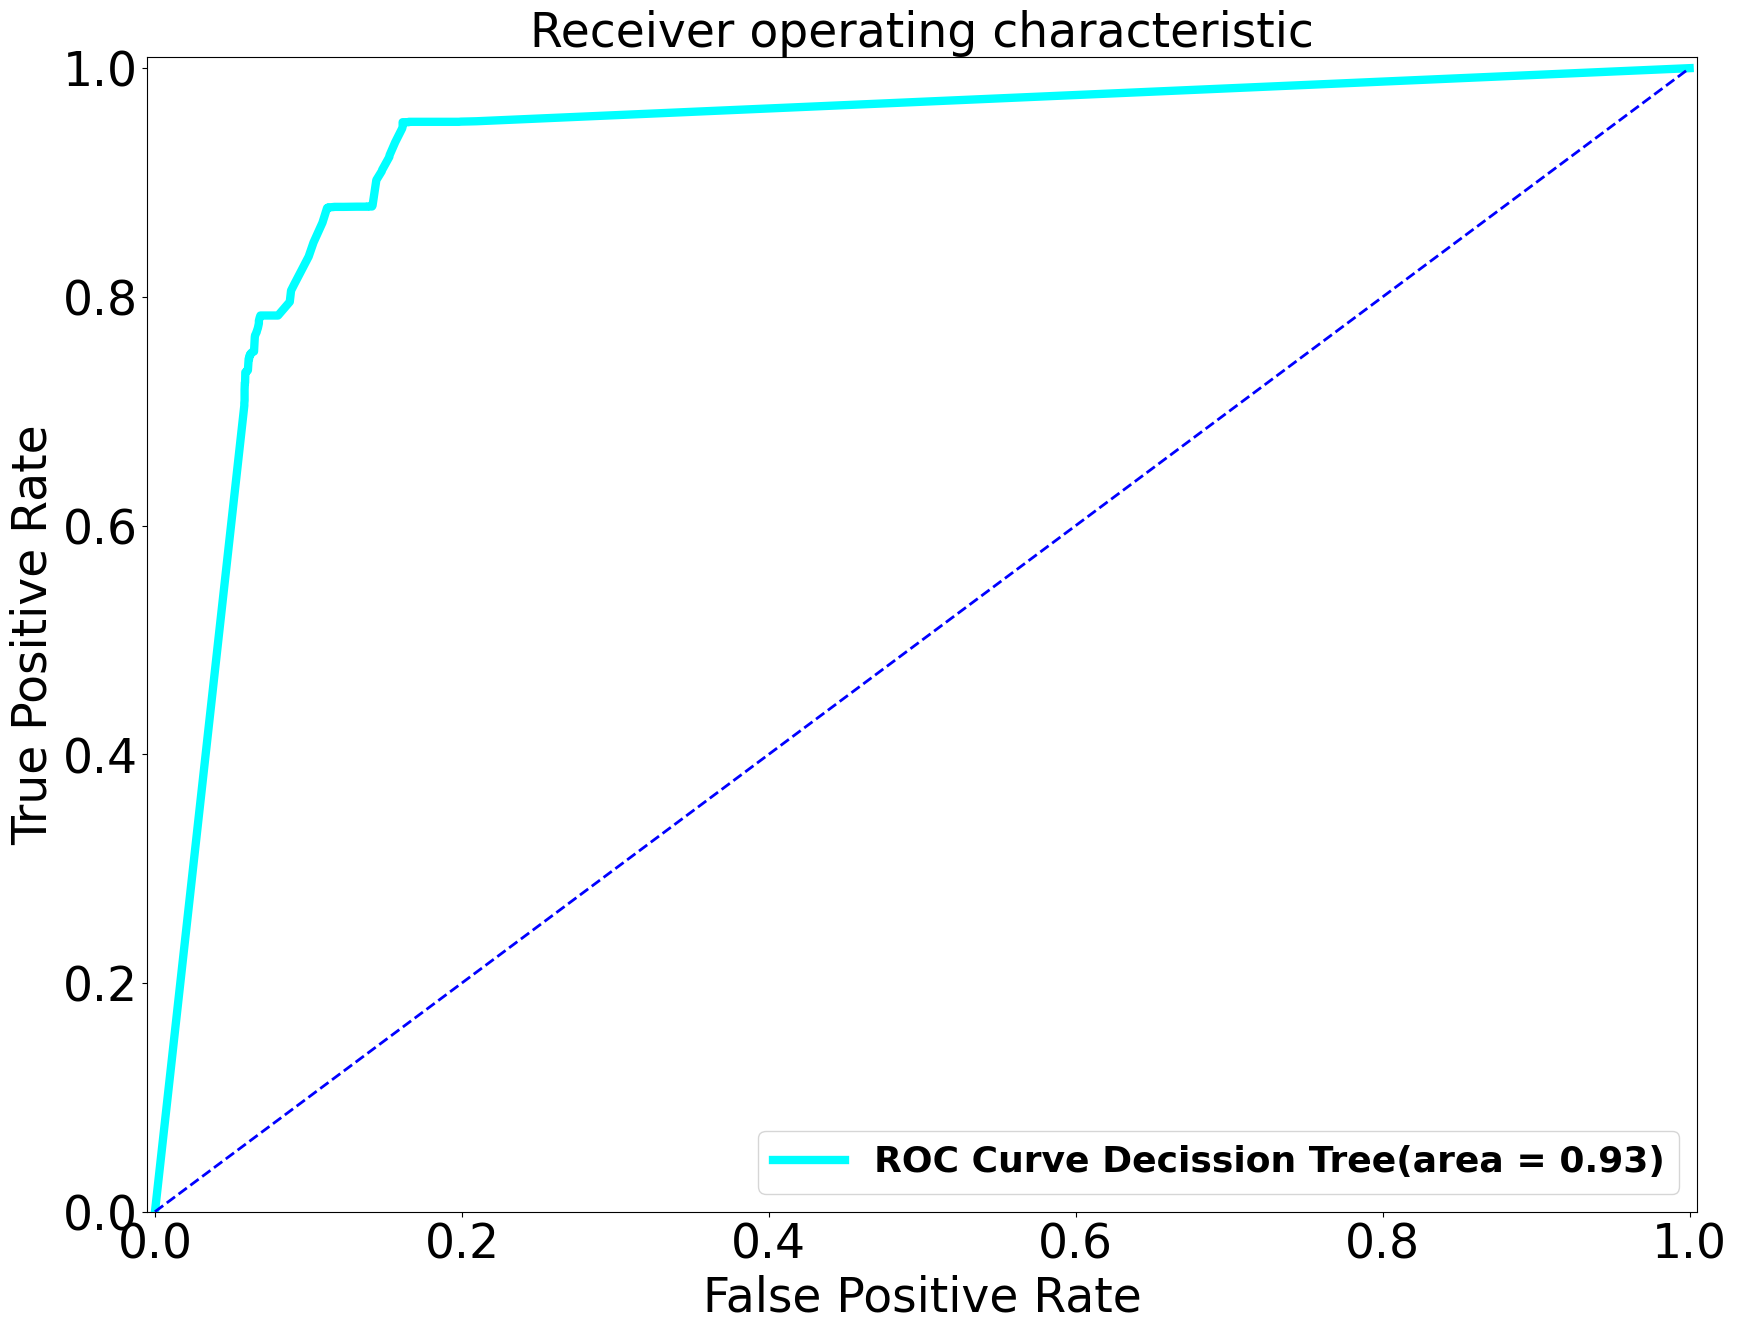

In [41]:
rc={'axes.labelsize': 34, 'font.size': 34, 'legend.fontsize': 34.0, 'axes.titlesize': 34}
plt.rcParams.update(**rc)
fig, ax=plt.subplots(figsize=(20,15))
plt.plot(fprd, tprd, color='cyan', lw=6, label='ROC Curve Decission Tree(area = %0.2f)' % AUCd)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc=4, prop={'size': 26,'weight':'bold','style':'normal'})
plt.show()